## SIMULACION DE LOGS Y GRAFICO DE DATOS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Generar 500 registros de logs simulados
np.random.seed(42)

# Lista de eventos de seguridad
eventos = ['login_success', 'login_failure', 'file_access', 'admin_login', 
           'password_change', 'firewall_block', 'suspicious_activity', 
           'malware_detected', 'port_scan']

In [ ]:
# Generar timestamps para una semana-parte JOEL SIZA 
fechas = pd.date_range(start='2023-01-01', periods=7)
timestamps = []
for fecha in fechas:
    for hora in range(24):
        for _ in range(3):  # 3 eventos por hora aprox
            timestamps.append(fecha + pd.Timedelta(hours=hora) + 
                             pd.Timedelta(minutes=np.random.randint(60)))

In [4]:
print(timestamps)

[Timestamp('2023-01-01 00:13:00'), Timestamp('2023-01-01 00:41:00'), Timestamp('2023-01-01 00:23:00'), Timestamp('2023-01-01 01:01:00'), Timestamp('2023-01-01 01:19:00'), Timestamp('2023-01-01 01:13:00'), Timestamp('2023-01-01 02:52:00'), Timestamp('2023-01-01 02:36:00'), Timestamp('2023-01-01 02:22:00'), Timestamp('2023-01-01 03:40:00'), Timestamp('2023-01-01 03:30:00'), Timestamp('2023-01-01 03:38:00'), Timestamp('2023-01-01 04:10:00'), Timestamp('2023-01-01 04:42:00'), Timestamp('2023-01-01 04:18:00'), Timestamp('2023-01-01 05:09:00'), Timestamp('2023-01-01 05:56:00'), Timestamp('2023-01-01 05:37:00'), Timestamp('2023-01-01 06:04:00'), Timestamp('2023-01-01 06:51:00'), Timestamp('2023-01-01 06:19:00'), Timestamp('2023-01-01 07:16:00'), Timestamp('2023-01-01 07:48:00'), Timestamp('2023-01-01 07:41:00'), Timestamp('2023-01-01 08:56:00'), Timestamp('2023-01-01 08:00:00'), Timestamp('2023-01-01 08:39:00'), Timestamp('2023-01-01 09:40:00'), Timestamp('2023-01-01 09:47:00'), Timestamp('20

In [6]:
# Ajustar al número de registros deseados
timestamps = timestamps[:500]

# Generar IPs aleatorias
def random_ip():
    return f"{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}"

# Usuarios del sistema
usuarios = ['admin', 'user1', 'user2', 'user3', 'system', 'guest', None]

# Generar datos simulados
data = {
    'timestamp': timestamps,
    'ip_origen': [random_ip() for _ in range(500)],
    'evento': np.random.choice(eventos, 500, p=[0.3, 0.2, 0.2, 0.05, 0.05, 0.08, 0.07, 0.03, 0.02]),
    'usuario': np.random.choice(usuarios, 500, p=[0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1]),
    'severidad': np.random.choice(['low', 'medium', 'high', 'critical'], 500, p=[0.5, 0.3, 0.15, 0.05]),
    'exitoso': np.random.choice([True, False], 500, p=[0.8, 0.2]),
}

In [7]:
# Crear DataFrame
logs_df = pd.DataFrame(data)

# Configurar timestamp como índice
logs_df['timestamp'] = pd.to_datetime(logs_df['timestamp'])
logs_df = logs_df.sort_values('timestamp')

# Ahora creamos las visualizaciones
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

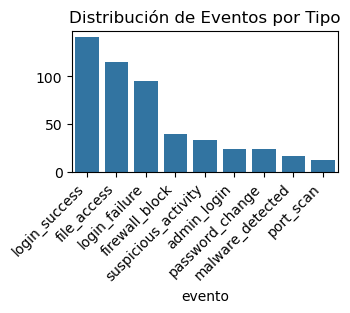

In [8]:
# 1. Distribución de eventos por tipo
plt.subplot(2, 2, 1)
eventos_count = logs_df['evento'].value_counts()
sns.barplot(x=eventos_count.index, y=eventos_count.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Eventos por Tipo')
plt.tight_layout()